**Задание 1**

1) Используя средства модуля [pandas](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/pandas.ipynb), определите среднюю, максималную, минимальную зарплату и среднюю, максималную, минимальную пенсию в Санкт-Петербурге в 2018 году.

2) Продемонстрируйте умение построения графиков (для произвольных значений) с помощью plot.


**Задание 2**

Для [файла](http://dfedorov.spb.ru/python3/forecast.html), расположенного в сети Интернет, напишите сценарий с использованием [модуля bs4](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/bs4.ipynb), который извлекает данные и сохраняет их в файле формата CSV, где первый столбец - день недели, второй столбец - погода. 

**Переходим к решению первой задачи:**

Импортируем модуль pandas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Читаем содержимое csv файла:

In [2]:
data = pd.read_csv('opendata.csv', encoding='cp1251')
data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


Далее пошаговый код...

In [13]:
df = pd.DataFrame(data, columns=['name','region','date','value'])

In [63]:
s=df[df['region']=='Санкт-Петербург'][df['name']=='Средняя зарплата'][(df['date']>='2018-01-01')&(df['date']<='2018-12-31')]
s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,region,date,value
36763,Средняя зарплата,Санкт-Петербург,2018-01-15,31599
36764,Средняя зарплата,Санкт-Петербург,2018-02-15,42401
36765,Средняя зарплата,Санкт-Петербург,2018-03-15,41373
36766,Средняя зарплата,Санкт-Петербург,2018-04-15,44363
36767,Средняя зарплата,Санкт-Петербург,2018-05-15,46424
36768,Средняя зарплата,Санкт-Петербург,2018-06-15,49700
36769,Средняя зарплата,Санкт-Петербург,2018-07-15,45798
36770,Средняя зарплата,Санкт-Петербург,2018-08-15,43612
36771,Средняя зарплата,Санкт-Петербург,2018-09-15,41412
36772,Средняя зарплата,Санкт-Петербург,2018-10-15,43450


In [65]:
s.value.mean()

43176.454545454544

In [66]:
s.value.max()

49700

In [67]:
s.value.min()

31599

In [68]:
p=df[df['region']=='Санкт-Петербург'][df['name']=='Средняя пенсия'][(df['date']>='2018-01-01')&(df['date']<='2018-12-31')]
p

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,region,date,value
41479,Средняя пенсия,Санкт-Петербург,2018-01-15,14694
41480,Средняя пенсия,Санкт-Петербург,2018-02-15,17019
41481,Средняя пенсия,Санкт-Петербург,2018-03-15,17058
41482,Средняя пенсия,Санкт-Петербург,2018-04-15,19922
41483,Средняя пенсия,Санкт-Петербург,2018-05-15,15276
41484,Средняя пенсия,Санкт-Петербург,2018-06-15,18958
41485,Средняя пенсия,Санкт-Петербург,2018-07-15,15045
41486,Средняя пенсия,Санкт-Петербург,2018-08-15,19636
41487,Средняя пенсия,Санкт-Петербург,2018-09-15,15106
41488,Средняя пенсия,Санкт-Петербург,2018-10-15,17644


In [69]:
p.value.mean()

17023.454545454544

In [70]:
p.value.max()

19922

In [71]:
p.value.min()

14694

TypeError: unhashable type: 'numpy.ndarray'

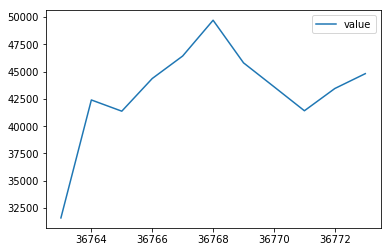

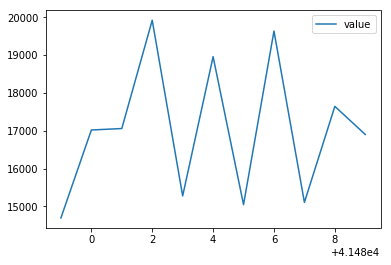

In [95]:
s.plot()
p.plot()
plt.plot(s,s,'r-',p,p,'b-')

**Переходим к решению второй задачи:**

In [84]:
import bs4

In [85]:
def read_url(url):
    """ Читает содержимое сайта """
    import urllib.request    
    with urllib.request.urlopen(url) as webpage:
        text = webpage.read().decode('utf-8')
    return text

In [86]:
text = read_url("http://dfedorov.spb.ru/python3/forecast.html")
print(text)

<html>
  <body>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Сегодня ночью</b></div>
        <div class="forecast-text">Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Пятница</b></div>
        <div class="forecast-text">Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Ночь пятницы</b></div>
        <div class="forecast-text">Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Суббота</b></div>
        <div class="f